In [1]:
import torch
import torchvision
# The main BackPACK functionalities
from backpack import backpack, extend
# The diagonal GGN extension
from backpack.extensions import DiagGGNMC
# This layer did not exist in Pytorch 1.0
#from backpack.cores import Flatten

/home/shahaichao/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Hyperparameters
BATCH_SIZE = 64
STEP_SIZE = 0.01
DAMPING = 1.0
MAX_ITER = 100
torch.manual_seed(0)

In [36]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)
lossfunc = torch.nn.CrossEntropyLoss()
model = extend(model)
lossfunc = extend(lossfunc)

In [13]:
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

In [29]:
from torch import rand
from torch.nn import CrossEntropyLoss, Flatten, Linear, Sequential

from backpack import backpack, extend
from backpack.extensions import (
    GGNMP,
    HMP,
    KFAC,
    KFLR,
    KFRA,
    PCHMP,
    BatchDiagGGNExact,
    BatchDiagGGNMC,
    BatchDiagHessian,
    BatchGrad,
    BatchL2Grad,
    DiagGGNExact,
    DiagGGNMC,
    DiagHessian,
    SqrtGGNExact,
    SqrtGGNMC,
    SumGradSquared,
    Variance,
)
from backpack.utils.examples import load_one_batch_mnist

X, y = load_one_batch_mnist(batch_size=516)

model = Sequential(Flatten(), Linear(784, 10))
lossfunc = CrossEntropyLoss()

model = extend(model)
lossfunc = extend(lossfunc)

In [30]:
loss = lossfunc(model(X), y)
with backpack(BatchGrad()):
    loss.backward()

for name, param in model.named_parameters():
    print(name)
    print(".grad.shape:             ", param.grad.shape)
    #print(".grad.shape:             ", param.grad)
    print(".grad_batch.shape:       ", param.grad_batch.shape)
    #print(".grad_batch.shape:             ", param.grad_batch)

1.weight
.grad.shape:              torch.Size([10, 784])
.grad_batch.shape:        torch.Size([516, 10, 784])
1.bias
.grad.shape:              torch.Size([10])
.grad_batch.shape:        torch.Size([516, 10])


In [31]:
param.grad_batch.shape

torch.Size([516, 10])

In [32]:
loss = lossfunc(model(X), y)
with backpack(Variance()):
    loss.backward()

for name, param in model.named_parameters():
    print(name)
    print(".grad.shape:             ", param.grad.shape)
    print(param.variance)
    print(".variance.shape:         ", param.variance.shape)

1.weight
.grad.shape:              torch.Size([10, 784])
tensor([[6.7788e-08, 6.7788e-08, 6.7788e-08,  ..., 6.7788e-08, 6.7788e-08,
         6.7788e-08],
        [7.3879e-08, 7.3879e-08, 7.3879e-08,  ..., 7.3879e-08, 7.3879e-08,
         7.3879e-08],
        [4.6309e-08, 4.6309e-08, 4.6309e-08,  ..., 4.6309e-08, 4.6309e-08,
         4.6309e-08],
        ...,
        [5.2762e-08, 5.2762e-08, 5.2762e-08,  ..., 5.2762e-08, 5.2762e-08,
         5.2762e-08],
        [5.3723e-08, 5.3723e-08, 5.3723e-08,  ..., 5.3723e-08, 5.3723e-08,
         5.3723e-08],
        [5.2177e-08, 5.2177e-08, 5.2177e-08,  ..., 5.2177e-08, 5.2177e-08,
         5.2177e-08]])
.variance.shape:          torch.Size([10, 784])
1.bias
.grad.shape:              torch.Size([10])
tensor([3.7669e-07, 4.1054e-07, 2.5734e-07, 3.8201e-07, 3.1100e-07, 3.2592e-07,
        4.3967e-07, 2.9320e-07, 2.9853e-07, 2.8994e-07])
.variance.shape:          torch.Size([10])


In [33]:
model.named_parameters()

<generator object Module.named_parameters at 0x7ff030843970>

In [34]:
loss = lossfunc(model(X), y)
with backpack(SumGradSquared()):
    loss.backward()

for name, param in model.named_parameters():
    print(name)
    print(param.grad)
    print(".grad.shape:             ", param.grad.shape)
    print(param.sum_grad_squared)
    print(".sum_grad_squared.shape: ", param.sum_grad_squared.shape)

1.weight
tensor([[-0.0218, -0.0218, -0.0218,  ..., -0.0218, -0.0218, -0.0218],
        [ 0.0834,  0.0834,  0.0834,  ...,  0.0834,  0.0834,  0.0834],
        [-0.0731, -0.0731, -0.0731,  ..., -0.0731, -0.0731, -0.0731],
        ...,
        [-0.0252, -0.0252, -0.0252,  ..., -0.0252, -0.0252, -0.0252],
        [-0.0195, -0.0195, -0.0195,  ..., -0.0195, -0.0195, -0.0195],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027]])
.grad.shape:              torch.Size([10, 784])
tensor([[3.5081e-05, 3.5081e-05, 3.5081e-05,  ..., 3.5081e-05, 3.5081e-05,
         3.5081e-05],
        [3.9619e-05, 3.9619e-05, 3.9619e-05,  ..., 3.9619e-05, 3.9619e-05,
         3.9619e-05],
        [2.5046e-05, 2.5046e-05, 2.5046e-05,  ..., 2.5046e-05, 2.5046e-05,
         2.5046e-05],
        ...,
        [2.7363e-05, 2.7363e-05, 2.7363e-05,  ..., 2.7363e-05, 2.7363e-05,
         2.7363e-05],
        [2.7803e-05, 2.7803e-05, 2.7803e-05,  ..., 2.7803e-05, 2.7803e-05,
         2.7803e-05],
        [2.

In [35]:
param.grad

tensor([ 0.0514, -0.1966,  0.1723,  0.0202, -0.0877,  0.1162, -0.1749,  0.0595,
         0.0461, -0.0064])

In [36]:
loss = lossfunc(model(X), y)
with backpack(BatchL2Grad()):
    loss.backward()

for name, param in model.named_parameters():
    print(name)
    print(".grad.shape:             ", param.grad.shape)
    print(param.batch_l2)
    print(".batch_l2.shape:         ", param.batch_l2.shape)

1.weight
.grad.shape:              torch.Size([10, 784])
tensor([0.0023, 0.0029, 0.0039, 0.0024, 0.0023, 0.0057, 0.0024, 0.0013, 0.0024,
        0.0037, 0.0028, 0.0026, 0.0018, 0.0013, 0.0021, 0.0029, 0.0020, 0.0018,
        0.0039, 0.0018, 0.0018, 0.0017, 0.0019, 0.0048, 0.0026, 0.0029, 0.0045,
        0.0028, 0.0027, 0.0014, 0.0027, 0.0036, 0.0016, 0.0027, 0.0033, 0.0029,
        0.0022, 0.0025, 0.0016, 0.0022, 0.0017, 0.0026, 0.0017, 0.0045, 0.0021,
        0.0022, 0.0028, 0.0027, 0.0063, 0.0027, 0.0022, 0.0023, 0.0027, 0.0027,
        0.0020, 0.0032, 0.0020, 0.0018, 0.0029, 0.0016, 0.0032, 0.0022, 0.0035,
        0.0025, 0.0018, 0.0013, 0.0026, 0.0035, 0.0019, 0.0024, 0.0036, 0.0050,
        0.0038, 0.0015, 0.0053, 0.0030, 0.0032, 0.0046, 0.0028, 0.0032, 0.0028,
        0.0038, 0.0031, 0.0040, 0.0021, 0.0024, 0.0037, 0.0033, 0.0018, 0.0022,
        0.0032, 0.0022, 0.0029, 0.0024, 0.0019, 0.0021, 0.0018, 0.0015, 0.0027,
        0.0029, 0.0029, 0.0029, 0.0029, 0.0025, 0.0025, 0.0027,

In [37]:
grad = []
batch_l2 = []
for name, param in model.named_parameters():
    grad.append(param.grad)
    batch_l2.append(param.batch_l2)

In [38]:
grad

[tensor([[-0.0291, -0.0291, -0.0291,  ..., -0.0291, -0.0291, -0.0291],
         [ 0.1112,  0.1112,  0.1112,  ...,  0.1112,  0.1112,  0.1112],
         [-0.0975, -0.0975, -0.0975,  ..., -0.0975, -0.0975, -0.0975],
         ...,
         [-0.0336, -0.0336, -0.0336,  ..., -0.0336, -0.0336, -0.0336],
         [-0.0261, -0.0261, -0.0261,  ..., -0.0261, -0.0261, -0.0261],
         [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036]]),
 tensor([ 0.0685, -0.2621,  0.2297,  0.0269, -0.1170,  0.1549, -0.2332,  0.0793,
          0.0614, -0.0086])]

In [39]:
batch_l2

[tensor([0.0023, 0.0029, 0.0039, 0.0024, 0.0023, 0.0057, 0.0024, 0.0013, 0.0024,
         0.0037, 0.0028, 0.0026, 0.0018, 0.0013, 0.0021, 0.0029, 0.0020, 0.0018,
         0.0039, 0.0018, 0.0018, 0.0017, 0.0019, 0.0048, 0.0026, 0.0029, 0.0045,
         0.0028, 0.0027, 0.0014, 0.0027, 0.0036, 0.0016, 0.0027, 0.0033, 0.0029,
         0.0022, 0.0025, 0.0016, 0.0022, 0.0017, 0.0026, 0.0017, 0.0045, 0.0021,
         0.0022, 0.0028, 0.0027, 0.0063, 0.0027, 0.0022, 0.0023, 0.0027, 0.0027,
         0.0020, 0.0032, 0.0020, 0.0018, 0.0029, 0.0016, 0.0032, 0.0022, 0.0035,
         0.0025, 0.0018, 0.0013, 0.0026, 0.0035, 0.0019, 0.0024, 0.0036, 0.0050,
         0.0038, 0.0015, 0.0053, 0.0030, 0.0032, 0.0046, 0.0028, 0.0032, 0.0028,
         0.0038, 0.0031, 0.0040, 0.0021, 0.0024, 0.0037, 0.0033, 0.0018, 0.0022,
         0.0032, 0.0022, 0.0029, 0.0024, 0.0019, 0.0021, 0.0018, 0.0015, 0.0027,
         0.0029, 0.0029, 0.0029, 0.0029, 0.0025, 0.0025, 0.0027, 0.0025, 0.0023,
         0.0039, 0.0014, 0.0

In [30]:
from torch.distributions import Normal
import math

mu = torch.tensor([0, 0], dtype=torch.float32)
a = math.exp(1)
sigma = torch.tensor(a, dtype=torch.float32)
 
dist = Normal(mu, sigma)  # 设置高斯分布的均值和方差
 
dist.sample()  # 采样

tensor([-3.4269, -4.2561])

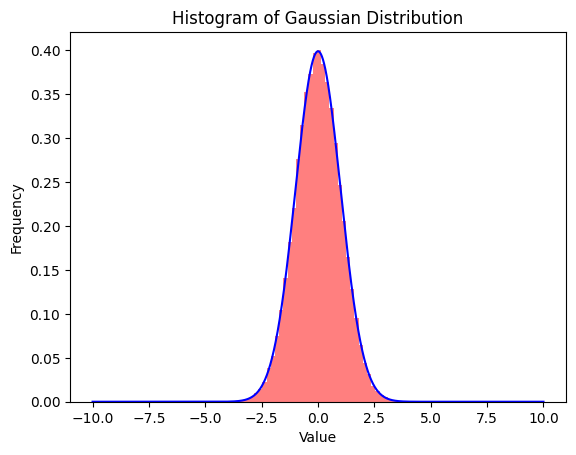

In [59]:
import numpy as np
import matplotlib.pyplot as plt
# 生成一维高斯分布N
#a = math.exp(1)
mu, sigma = 0, 1  # 均值和标准差
N = np.random.normal(mu, sigma, size=100000)
# 绘制直方图
plt.hist(N, bins=50, density=True, alpha=0.5, color='r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian Distribution')
# 绘制概率密度函数
x = np.linspace(mu - 10, mu + 10, 10000)
y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
plt.plot(x, y, color='b')
# 显示图像
plt.show()

In [46]:
a

2.718281828459045

In [60]:
math.exp(2)

7.38905609893065

In [1]:
### dpsgd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import Optimizer

from backpack import backpack, extend
from backpack.extensions import BatchGrad, BatchL2Grad
from backpack.utils.examples import get_mnist_dataloader

NUM_EPOCHS = 1
PRINT_EVERY = 50
MAX_ITER = 20
BATCH_SIZE = 64
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)


def make_broadcastable(v, X):
    """Returns a view of `v` that can be broadcast with `X`.

    If `v` is a one-dimensional tensor [N] and `X` is a tensor of shape
    `[N, ..., ]`, returns a view of v with singleton dimensions appended.

    Example:
        `v` is a tensor of shape `[10]` and `X` is a tensor of shape `[10, 3, 3]`.
        We want to multiply each `[3, 3]` element of `X` by the corresponding
        element of `v` to get a matrix `Y` of shape `[10, 3, 3]` such that
        `Y[i, a, b] = v[i] * X[i, a, b]`.

        `w = make_broadcastable(v, X)` gives a `w` of shape `[10, 1, 1]`,
        and we can now broadcast `Y = w * X`.
    """
    broadcasting_shape = (-1, *[1 for _ in X.shape[1:]])
    return v.reshape(broadcasting_shape)


def accuracy(output, targets):
    predictions = output.argmax(dim=1, keepdim=True).view_as(targets)
    return predictions.eq(targets).float().mean().item()



/home/shahaichao/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [118]:
def make_small_cnn(outputs=10, channels=(16, 32), fc_dim=32, kernels=(8, 4)):
    return nn.Sequential(
        nn.ZeroPad2d((3, 4, 3, 4)),
        nn.Conv2d(1, channels[0], kernels[0], stride=2, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=1),
        nn.Conv2d(channels[0], channels[1], kernels[1], stride=2, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=1),
        nn.Flatten(),
        nn.Linear(channels[1] * 4 * 4, fc_dim),
        nn.ReLU(),
        nn.Linear(fc_dim, outputs),
    )


mnist_dataloader = get_mnist_dataloader(batch_size=BATCH_SIZE)

model = make_small_cnn().to(DEVICE)
loss_function = nn.CrossEntropyLoss().to(DEVICE)

In [3]:
channels=(16, 32)
channels[0]

16

In [4]:
model = extend(model)

In [5]:
x, y = next(iter(mnist_dataloader))
x, y = x.to(DEVICE), y.to(DEVICE)

loss = loss_function(model(x), y)
with backpack(BatchL2Grad(), BatchGrad()):
    loss.backward()

In [6]:
for p in model.parameters():
    #print(name)
    print(
        "{:28} {:32} {}".format(
            str(p.grad.shape), str(p.grad_batch.shape), str(p.batch_l2.shape)
        )
    )

torch.Size([16, 1, 8, 8])    torch.Size([64, 16, 1, 8, 8])    torch.Size([64])
torch.Size([16])             torch.Size([64, 16])             torch.Size([64])
torch.Size([32, 16, 4, 4])   torch.Size([64, 32, 16, 4, 4])   torch.Size([64])
torch.Size([32])             torch.Size([64, 32])             torch.Size([64])
torch.Size([32, 512])        torch.Size([64, 32, 512])        torch.Size([64])
torch.Size([32])             torch.Size([64, 32])             torch.Size([64])
torch.Size([10, 32])         torch.Size([64, 10, 32])         torch.Size([64])
torch.Size([10])             torch.Size([64, 10])             torch.Size([64])


In [8]:
l2_norms_squared_all_params = torch.stack([p.batch_l2 for p in model.parameters()])
l2_norms = torch.sqrt(torch.sum(l2_norms_squared_all_params, dim=0))

In [9]:
l2_norms_squared_all_params.shape

torch.Size([8, 64])

In [10]:
l2_norms

tensor([0.0859, 0.0776, 0.0813, 0.0615, 0.0798, 0.0787, 0.0991, 0.0924, 0.0762,
        0.0659, 0.0836, 0.0971, 0.0690, 0.0656, 0.0839, 0.0606, 0.0797, 0.0723,
        0.0832, 0.0726, 0.0703, 0.0756, 0.0792, 0.0622, 0.0884, 0.0689, 0.0677,
        0.0822, 0.0948, 0.0704, 0.0816, 0.0886, 0.0899, 0.0765, 0.0782, 0.0697,
        0.0708, 0.0753, 0.0925, 0.0578, 0.0723, 0.0725, 0.0651, 0.0672, 0.0641,
        0.0880, 0.0558, 0.0562, 0.0642, 0.0749, 0.0745, 0.0639, 0.0785, 0.0641,
        0.0839, 0.0863, 0.0831, 0.0801, 0.0564, 0.0715, 0.0877, 0.0555, 0.0774,
        0.0955], device='cuda:0')

In [11]:
C = 0.1
scaling_factors = torch.clamp_max(l2_norms / C, 1.0)

In [12]:
for p in model.parameters():
    clipped_grads = p.grad_batch * make_broadcastable(scaling_factors, p.grad_batch)
    clipped_grad = torch.sum(clipped_grads, dim=0)

In [9]:
class DP_SGD(Optimizer):
    """Differentially Private SGD.

    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): coefficient that scale delta before it is applied
            to the parameters (default: 1.0)
        max_norm (float, optional): maximum norm of the individual gradient,
            to which they will be clipped if exceeded (default: 0.01)
        stddev (float, optional): standard deviation of the added noise
            (default: 1.0)
    """

    def __init__(self, params, grad_norm, noise_norm, lr=0.1, max_norm=0.1, stddev=2.0):
        self.lr = lr
        self.max_norm = max_norm
        self.stddev = stddev
        self.noise_norm = noise_norm
        
        super().__init__(params, dict())

    def step(self):
        """Performs a single optimization step.

        The function expects the gradients to have been computed by BackPACK
        and the parameters to have a ``batch_l2`` and ``grad_batch`` attribute.
        """
        l2_norms_all_params_list = []
        for group in self.param_groups:
            for p in group["params"]:
                #print("p:", len(p))
                l2_norms_all_params_list.append(p.batch_l2)

        l2_norms_all_params = torch.stack(l2_norms_all_params_list)
        print("l2_norms_all_params:", l2_norms_all_params.shape)
        total_norms = torch.sqrt(torch.sum(l2_norms_all_params, dim=0))
        print("total_norms:",total_norms.shape)
        scaling_factors = torch.clamp_max(total_norms / self.max_norm, 1.0)
        print("scaling_factors:",scaling_factors.shape)

        for group in self.param_groups:
            i = 0
            for p in group["params"]:
                clipped_grads = p.grad_batch * make_broadcastable(
                    scaling_factors, p.grad_batch
                )
                clipped_grad = torch.sum(clipped_grads, dim=0)

                noise_magnitude = self.stddev * self.max_norm
                noise = torch.randn_like(clipped_grad) * noise_magnitude
                if i == 4:
                    print("noise:", torch.norm(noise))
                    self.noise_norm.append(torch.norm(noise))

                perturbed_update = clipped_grad + noise

                p.data.add_(-self.lr * perturbed_update)
                i = i+1

In [14]:
grad_norm = []
noise_norm = []

optimizer = DP_SGD(model.parameters(), grad_norm, noise_norm, lr=0.1, max_norm=0.1, stddev=2.0)

losses = []
accuracies = []
for epoch in range(NUM_EPOCHS):
    print("epoch:", epoch)
    for batch_idx, (x, y) in enumerate(mnist_dataloader):
        x, y = x.to(DEVICE), y.to(DEVICE)

        optimizer.zero_grad()
        #print("noise_norm:", noise_norm)
        outputs = model(x)
        loss = loss_function(outputs, y)

        with backpack(BatchGrad(), BatchL2Grad()):
            loss.backward()

        optimizer.step()

        # Logging
        losses.append(loss.detach().item())
        accuracies.append(accuracy(outputs, y))

        if (batch_idx % PRINT_EVERY) == 0:
            print(
                "Epoch %3.d/%d Iteration %3.d " % (epoch, NUM_EPOCHS, batch_idx)
                + "Minibatch Loss %.3f  " % losses[-1]
                + "Accuracy %.3f" % accuracies[-1]
            )

        if MAX_ITER is not None and batch_idx > MAX_ITER:
            break

epoch: 0
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.5363, device='cuda:0')
Epoch   0/1 Iteration   0 Minibatch Loss 2.309  Accuracy 0.094
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.4161, device='cuda:0')
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.4562, device='cuda:0')
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.1893, device='cuda:0')
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.8125, device='cuda:0')
l2_norms_all_params: torch.Size([8, 64])
total_norms: torch.Size([64])
scaling_factors: torch.Size([64])
noise: tensor(25.7622, device='cuda:0')
l2_norms_all_params: torch.Size([8, 64])
total_norms: torc

Text(0.5, 0, 'Iteration')

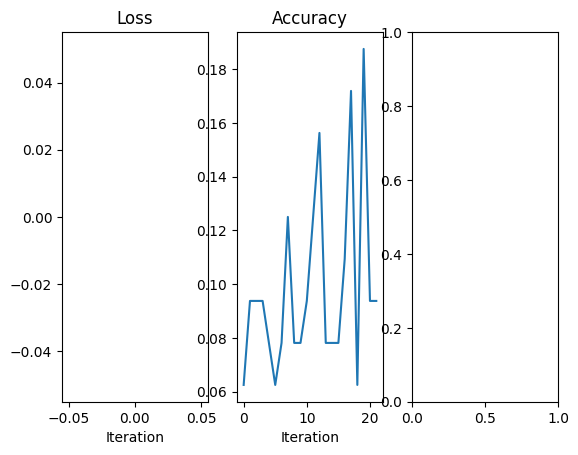

In [105]:
fig = plt.figure()
axes = [fig.add_subplot(1, 3, 1), fig.add_subplot(1, 3, 2), fig.add_subplot(1, 3, 3)]

axes[0].plot(losses)
axes[0].set_title("Loss")
axes[0].set_xlabel("Iteration")

axes[1].plot(accuracies)
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Iteration")


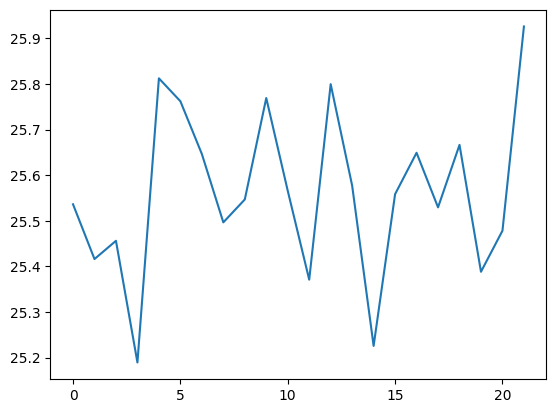

In [54]:
#noise_norm_cpu = noise_norm.cpu()
import numpy as np
t = np.arange(22)
plt.figure()
l1=plt.plot(t, np.array(torch.tensor(noise_norm, device='cpu')), label='dpsgd-noise_norm')

In [108]:
print("noise_norm:", len(noise_norm))

noise_norm: 22


In [1]:
### sparsity
class DP_SGD(Optimizer):
    """Differentially Private SGD.

    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): coefficient that scale delta before it is applied
            to the parameters (default: 1.0)
        max_norm (float, optional): maximum norm of the individual gradient,
            to which they will be clipped if exceeded (default: 0.01)
        stddev (float, optional): standard deviation of the added noise
            (default: 1.0)
    """

    def __init__(self, params, grad_norm, noise_norm, lr=0.1, max_norm=0.1, stddev=2.0):
        self.lr = lr
        self.max_norm = max_norm
        self.stddev = stddev
        self.noise_norm = noise_norm
        
        super().__init__(params, dict())

    def step(self):
        """Performs a single optimization step.

        The function expects the gradients to have been computed by BackPACK
        and the parameters to have a ``batch_l2`` and ``grad_batch`` attribute.
        """
        l2_norms_all_params_list = []
        for group in self.param_groups:
            for p in group["params"]:
                print("p.batch_l2:", p.batch_l2)
                print("p.grad_batch-shape:", p.grad_batch.shape)
                print("p.grad_batch-norm:", torch.norm(p.grad_batch[0].reshape(-1,1).squeeze()))
                print("p.grad_batch-norm:", torch.norm(p.grad_batch[1].reshape(-1,1).squeeze()))
                l2_norms_all_params_list.append(p.batch_l2)
        
        l2_norms_all_params = torch.stack(l2_norms_all_params_list)
        print("l2_norms_all_params:", l2_norms_all_params.shape)
        #print("l2_norms_all_params:", l2_norms_all_params.shape)
        total_norms = torch.sqrt(torch.sum(l2_norms_all_params, dim=0))
        scaling_factors = torch.clamp_max(total_norms / self.max_norm, 1.0)
        print("total_norms:", total_norms.shape)

        for group in self.param_groups:
            i = 0
            for p in group["params"]:
                clipped_grads = p.grad_batch * make_broadcastable(
                    scaling_factors, p.grad_batch
                )
                print("clipped_grads:", clipped_grads.shape)
                clipped_grad = torch.sum(clipped_grads, dim=0)

                noise_magnitude = self.stddev * self.max_norm
                noise = torch.randn_like(clipped_grad) * noise_magnitude
                if i == 4:
                    print("noise:", torch.norm(noise))
                    self.noise_norm.append(torch.norm(noise))

                perturbed_update = clipped_grad + noise

                p.data.add_(-self.lr * perturbed_update)
                i = i+1

NameError: name 'Optimizer' is not defined

In [15]:
grad_norm = []
noise_norm = []

optimizer = DP_SGD(model.parameters(), grad_norm, noise_norm, lr=0.1, max_norm=0.1, stddev=2.0)

losses = []
accuracies = []
for epoch in range(NUM_EPOCHS):
    print("epoch:", epoch)
    for batch_idx, (x, y) in enumerate(mnist_dataloader):
        x, y = x.to(DEVICE), y.to(DEVICE)

        optimizer.zero_grad()
        #print("noise_norm:", noise_norm)
        outputs = model(x)
        loss = loss_function(outputs, y)

        with backpack(BatchGrad(), BatchL2Grad()):
            loss.backward()

        optimizer.step()

        # Logging
        losses.append(loss.detach().item())
        accuracies.append(accuracy(outputs, y))

        if (batch_idx % PRINT_EVERY) == 0:
            print(
                "Epoch %3.d/%d Iteration %3.d " % (epoch, NUM_EPOCHS, batch_idx)
                + "Minibatch Loss %.3f  " % losses[-1]
                + "Accuracy %.3f" % accuracies[-1]
            )

        if MAX_ITER is not None and batch_idx > MAX_ITER:
            break

epoch: 0
p.batch_l2: tensor([4.4997e-03, 1.7281e-03, 1.9564e-03, 3.0419e-02, 1.0252e-02, 1.2383e-02,
        9.2400e-03, 1.1565e-02, 2.7908e-03, 1.6076e-02, 1.2413e-02, 2.9156e-03,
        8.0995e-04, 7.6552e-03, 1.1830e-02, 7.0774e-03, 1.1208e-02, 6.3561e-03,
        5.9798e-03, 8.0870e-03, 2.7075e-03, 1.1986e-02, 1.1714e-02, 1.0914e-02,
        2.6329e-03, 7.3661e-03, 1.9859e-02, 1.4037e-02, 5.6484e-03, 9.7185e-03,
        4.0683e-03, 1.6134e-02, 2.5009e-02, 8.9288e-03, 1.9991e-02, 1.2827e-02,
        7.7101e-03, 4.2399e-03, 1.5549e-03, 7.7393e-05, 6.9114e-03, 8.2746e-03,
        6.7250e-03, 1.5159e-02, 5.8999e-03, 1.0146e-03, 1.4294e-02, 1.9029e-03,
        7.9649e-03, 6.3235e-03, 4.3431e-03, 5.8983e-03, 4.3676e-03, 1.4369e-02,
        9.8081e-03, 8.3875e-03, 2.9355e-03, 1.3890e-02, 2.0931e-02, 2.2558e-02,
        6.5083e-03, 1.2021e-02, 4.1243e-03, 7.4022e-03], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 16, 1, 8, 8])
p.grad_batch-norm: tensor(0.0671, device='cuda:0')
p.gr

p.batch_l2: tensor([6.8523e-03, 1.2883e-02, 4.5884e-02, 1.6217e-02, 1.8674e-02, 3.4732e-02,
        8.5769e-03, 2.1522e-02, 1.6805e-02, 2.9150e-02, 3.1486e-02, 3.6061e-02,
        1.9201e-02, 1.3991e-02, 1.4675e-02, 2.5713e-02, 2.4208e-02, 3.4612e-02,
        3.7172e-02, 1.2184e-01, 3.6149e-02, 1.2438e-02, 2.1832e-02, 5.9907e-03,
        4.0478e-02, 1.6984e-03, 7.1861e-02, 4.1793e-02, 1.9676e-02, 3.3890e-02,
        6.9903e-03, 2.0003e-02, 7.3101e-02, 1.2459e-06, 1.5437e-02, 2.9746e-02,
        1.8632e-02, 6.8217e-03, 9.1178e-02, 9.4678e-02, 1.1674e-02, 9.6668e-03,
        1.5104e-02, 2.6124e-02, 9.0958e-03, 2.7097e-02, 1.4048e-02, 4.3987e-03,
        6.0482e-02, 1.7285e-02, 3.6615e-02, 6.9567e-03, 2.7449e-02, 1.3691e-02,
        1.0330e-02, 9.8010e-03, 1.1170e-04, 2.4655e-02, 2.3482e-02, 1.7552e-02,
        3.5334e-02, 1.0694e-02, 2.6948e-02, 3.5631e-02], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 16, 1, 8, 8])
p.grad_batch-norm: tensor(0.0828, device='cuda:0')
p.grad_batch-

p.batch_l2: tensor([7.4271e-08, 2.1703e-05, 2.5411e-05, 1.7449e-05, 1.3866e-05, 3.8209e-05,
        6.3378e-05, 1.0444e-06, 3.6055e-06, 3.6051e-05, 6.0658e-05, 5.0730e-05,
        1.7855e-04, 1.2919e-05, 2.7585e-05, 3.5844e-05, 2.2276e-05, 5.5580e-05,
        1.1175e-06, 1.7445e-06, 5.8914e-06, 1.7613e-05, 4.7483e-05, 1.7402e-05,
        3.3081e-06, 2.4252e-05, 7.9613e-06, 1.1577e-05, 1.8864e-05, 3.1367e-05,
        8.8884e-05, 2.0903e-05, 1.4518e-05, 7.6410e-05, 2.9227e-05, 2.9511e-05,
        9.9034e-06, 9.7102e-08, 1.1043e-05, 4.3934e-05, 3.8785e-05, 2.3045e-05,
        1.2367e-05, 7.6578e-06, 7.2175e-07, 4.9417e-05, 6.0403e-06, 2.9464e-06,
        1.0852e-05, 4.3517e-06, 8.7126e-06, 2.2625e-05, 1.7336e-05, 3.3696e-05,
        1.6051e-05, 3.2309e-05, 2.0449e-06, 6.6601e-06, 9.3042e-05, 7.2306e-06,
        3.1331e-05, 7.1300e-06, 1.5489e-05, 7.1621e-06], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 32])
p.grad_batch-norm: tensor(0.0003, device='cuda:0')
p.grad_batch-norm: ten

p.batch_l2: tensor([1.1394e-02, 5.3044e-03, 8.7495e-04, 2.4289e-03, 1.0083e-04, 5.1635e-02,
        1.0484e-02, 3.0303e-02, 2.0424e-02, 1.0939e-01, 6.4910e-02, 6.9143e-03,
        6.0170e-03, 1.0377e-02, 4.2353e-02, 2.7196e-03, 1.6064e-02, 4.7629e-02,
        1.1982e-02, 9.8534e-03, 2.3834e-03, 9.5943e-03, 4.8246e-02, 1.2974e-02,
        5.5042e-03, 2.9087e-02, 3.0611e-02, 8.3184e-02, 1.1716e-01, 7.0769e-02,
        9.7389e-03, 4.3589e-02, 1.8799e-02, 5.1641e-02, 2.6255e-02, 1.1414e-02,
        1.9295e-02, 2.2998e-02, 5.1422e-03, 5.7780e-02, 3.1679e-02, 5.0118e-02,
        6.6519e-03, 1.1686e-01, 2.6675e-02, 7.4724e-02, 4.4452e-03, 4.7439e-02,
        2.1624e-02, 5.3776e-03, 3.6207e-03, 6.9784e-02, 2.6176e-03, 3.3637e-02,
        2.5640e-02, 2.1992e-02, 4.5497e-02, 4.0649e-02, 2.3724e-02, 1.9445e-05,
        2.1430e-02, 4.4872e-03, 4.9519e-02, 1.1560e-04], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 16, 1, 8, 8])
p.grad_batch-norm: tensor(0.1067, device='cuda:0')
p.grad_batch-

p.batch_l2: tensor([2.0390e-01, 7.5807e-05, 2.9673e-02, 9.0335e-02, 2.3903e-03, 7.4442e-05,
        1.0796e-01, 4.6245e-02, 4.4461e-04, 6.5851e-04, 2.0066e-02, 9.6696e-02,
        2.4766e-03, 9.9028e-04, 1.4844e-02, 1.4582e-02, 1.3248e-01, 1.4559e-03,
        7.0371e-02, 3.7781e-02, 1.3798e-03, 1.5147e-02, 1.3557e-01, 2.1535e-03,
        4.1160e-02, 4.1274e-02, 7.1333e-02, 2.5397e-04, 4.1945e-02, 7.1174e-05,
        5.4977e-02, 4.6654e-02, 1.7926e-02, 6.4881e-02, 6.8607e-03, 4.4614e-02,
        6.9702e-02, 1.6511e-02, 4.9069e-02, 1.2372e-02, 5.1240e-02, 3.2309e-04,
        5.7329e-02, 2.9638e-02, 8.5086e-02, 2.3341e-07, 1.4747e-03, 1.6051e-02,
        3.6228e-03, 7.8632e-03, 3.1023e-03, 5.4253e-03, 1.3584e-01, 6.3322e-04,
        6.2759e-02, 2.1584e-02, 2.4204e-03, 3.9752e-02, 9.2823e-05, 1.8010e-01,
        4.6105e-02, 1.4248e-02, 3.1244e-02, 8.3031e-03], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 32, 512])
p.grad_batch-norm: tensor(0.4516, device='cuda:0')
p.grad_batch-norm

p.batch_l2: tensor([7.7848e-02, 1.1092e-01, 4.8946e-02, 6.5613e-02, 2.0300e-04, 1.0054e-02,
        3.2271e-02, 1.0447e-02, 4.5113e-02, 7.1345e-02, 5.2239e-02, 4.3785e-04,
        2.7274e-03, 2.3618e-02, 1.1333e-01, 1.7341e-01, 7.2713e-02, 5.3002e-02,
        2.1560e-03, 2.9518e-03, 5.2703e-02, 5.5708e-04, 3.0972e-03, 7.2148e-02,
        4.7890e-02, 4.6984e-02, 1.1076e-03, 3.2745e-02, 9.5706e-02, 1.5255e-02,
        3.7504e-02, 4.9093e-02, 8.3660e-03, 1.4790e-02, 8.2007e-04, 2.9334e-02,
        6.3067e-02, 4.6581e-02, 1.5536e-01, 6.1077e-02, 1.7361e-03, 7.9676e-02,
        5.7867e-03, 1.1526e-02, 4.3187e-02, 5.8155e-02, 1.2139e-03, 2.1445e-02,
        2.9780e-02, 3.7664e-03, 1.2019e-04, 3.5834e-02, 7.2757e-02, 1.5598e-01,
        2.1519e-02, 2.2073e-02, 7.4097e-03, 2.6203e-03, 4.3304e-02, 1.8240e-02,
        1.2294e-02, 1.9145e-02, 4.1719e-04, 2.0768e-02], device='cuda:0')
p.grad_batch-shape: torch.Size([64, 16, 1, 8, 8])
p.grad_batch-norm: tensor(0.2790, device='cuda:0')
p.grad_batch-

p.grad_batch-norm: tensor(0.0073, device='cuda:0')
p.grad_batch-norm: tensor(0.0057, device='cuda:0')
p.batch_l2: tensor([4.0215e-02, 1.1973e-02, 3.8654e-03, 4.3790e-02, 6.7591e-02, 1.3404e-01,
        2.1873e-02, 6.5487e-02, 1.1731e-02, 7.1623e-04, 2.5375e-03, 3.7013e-02,
        6.8986e-03, 4.4180e-02, 5.0952e-02, 2.5610e-02, 1.0573e-01, 1.3287e-02,
        5.8595e-05, 1.4262e-04, 2.9158e-03, 5.9498e-03, 6.0406e-02, 1.3333e-03,
        1.5214e-02, 7.1491e-05, 2.3492e-02, 4.7395e-03, 1.1975e-03, 3.6429e-02,
        4.6829e-03, 5.5580e-05, 5.7764e-05, 1.2243e-01, 7.8983e-02, 7.7149e-03,
        1.0669e-02, 1.5532e-03, 4.0228e-03, 2.1200e-01, 1.3767e-02, 1.2483e-01,
        2.7358e-03, 2.2891e-02, 6.4166e-02, 1.6476e-02, 2.6535e-02, 2.1454e-02,
        9.3879e-03, 3.1400e-03, 2.2942e-02, 4.0409e-02, 2.4084e-05, 4.0139e-02,
        1.0588e-02, 5.0773e-02, 4.0505e-02, 4.0083e-03, 8.8671e-02, 1.8459e-02,
        2.1542e-02, 5.3951e-03, 1.1151e-02, 7.0504e-03], device='cuda:0')
p.grad_batch

In [32]:
grad = torch.randn(10000,1,dtype=torch.float32)

In [35]:
grad_1 = grad.expand(10000,10000).T

In [36]:
grad_1[:,0].shape

torch.Size([10000])

In [44]:
torch.matmul(grad_1 ,grad_1.T)

tensor([[9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689],
        [9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689],
        [9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689],
        ...,
        [9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689],
        [9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689],
        [9761.1689, 9761.1689, 9761.1689,  ..., 9761.1689, 9761.1689,
         9761.1689]])

In [30]:
grad_1= torch.ones(1,10000)
grad_2= torch.ones(1,10000)+2

In [79]:
(grad - torch.mean(grad,dim=0)).shape

torch.Size([1, 100])

In [41]:
torch.mean(grad,dim=1)

tensor([-0.0092])

In [97]:
torch.norm(torch.matmul(grad,grad_2.T))

tensor(88.1666)

In [81]:
torch.mean(grad,dim=0).shape

torch.Size([100])

In [82]:
torch.matmul(grad.T,grad)

tensor([[9., 9., 9.,  ..., 9., 9., 9.],
        [9., 9., 9.,  ..., 9., 9., 9.],
        [9., 9., 9.,  ..., 9., 9., 9.],
        ...,
        [9., 9., 9.,  ..., 9., 9., 9.],
        [9., 9., 9.,  ..., 9., 9., 9.],
        [9., 9., 9.,  ..., 9., 9., 9.]])

In [47]:
#u,e,v = torch.linalg.svd(torch.matmul(grad.T-torch.mean(grad,dim=1),grad_1),full_matrices=True)
u,e,v = torch.linalg.svd(0*grad_1.T,full_matrices=True)

In [48]:
e

tensor([0.])

In [73]:
u,e,v = torch.linalg.svd(grad,full_matrices=True)

In [74]:
e

tensor([31.3267])

In [13]:
u.shape

torch.Size([10, 10])

In [65]:
u1,e1,v1 = torch.linalg.svd(torch.matmul(grad[0,:].reshape(-1,1),grad[0,:].reshape(1,-1)),full_matrices=True)

In [131]:
e

tensor([1.1297e+03, 1.0854e+03, 1.0545e+03, 1.0459e+03, 1.0262e+03, 9.8540e+02,
        9.5924e+02, 9.2682e+02, 8.8534e+02, 8.4996e+02, 4.3788e-04, 2.8055e-04,
        2.3513e-04, 1.9746e-04, 1.3537e-04, 1.2707e-04, 1.2450e-04, 1.1272e-04,
        1.0477e-04, 1.0103e-04, 8.3788e-05, 8.2241e-05, 7.0967e-05, 6.7113e-05,
        6.3447e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05, 6.2441e-05,
        6.2441e-05, 6.2441e-05, 6.2441e-

In [128]:
grad.shape

torch.Size([10, 1000])

In [18]:
torch.norm(torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad))

tensor(34.8521)

In [146]:
sum_1 = 0
for i in range(10):
    print(torch.norm(torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad.T[:,i])) )

tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)
tensor(33.6114)


In [152]:
torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad.T[:,1])

tensor([-3.0530e-01,  7.6692e-03,  9.9719e-03, -8.5070e-02, -2.0869e-02,
        -7.0017e-02,  1.6949e-01, -9.7118e-02, -2.0678e-01,  3.9112e-02,
         1.0105e-01,  9.9604e-02, -2.3406e-01, -2.7081e-02, -9.9069e-03,
        -4.9222e-02,  1.3824e-01, -6.2047e-02,  2.8869e-01, -1.4544e-01,
         1.9592e-02,  2.1915e-01,  2.6815e-01,  7.3943e-02, -1.3010e-01,
         7.1754e-02, -6.7268e-02, -1.7541e-01,  6.1326e-03, -9.2325e-02,
         2.2296e-01,  5.3372e-02,  4.8533e-02,  4.1103e-02, -1.6926e-01,
         4.0703e-02,  1.1291e-01, -1.1200e-01,  3.7640e-02, -1.8864e-02,
        -1.0695e-01, -8.4429e-02, -3.8227e-02,  1.5085e-03, -1.4342e-01,
        -6.8454e-02, -4.2904e-02,  6.2296e-03, -7.4124e-02, -4.8945e-02,
        -3.7292e-02, -1.1107e-01,  3.7356e-02,  1.4186e-01, -2.0900e-02,
         7.0036e-02, -5.5026e-02, -2.5038e-01, -1.1998e-02, -3.3142e-03,
         8.1840e-02,  1.3848e-01,  1.3135e-02, -1.8900e-01, -6.0346e-02,
         8.6473e-02, -2.5847e-02, -5.4696e-02, -5.0

In [155]:
torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad.T).T

tensor([[ 0.8887, -0.0223, -0.0290,  ..., -0.6342,  0.2431, -0.2051],
        [-0.3053,  0.0077,  0.0100,  ...,  0.2179, -0.0835,  0.0705],
        [ 0.4388, -0.0110, -0.0143,  ..., -0.3131,  0.1200, -0.1013],
        ...,
        [ 0.4606, -0.0116, -0.0150,  ..., -0.3287,  0.1260, -0.1063],
        [ 0.2651, -0.0067, -0.0087,  ..., -0.1892,  0.0725, -0.0612],
        [ 0.5392, -0.0135, -0.0176,  ..., -0.3848,  0.1475, -0.1244]])

In [102]:
torch.norm(torch.matmul(torch.matmul(u1[:,0:1],u1[:,0:1].T),grad[0,:]))

tensor(30.8037)

In [81]:
uk,ek,vk = torch.linalg.svd(torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad[0,:].reshape(-1,1)),full_matrices=True)

In [113]:
grad = torch.randn(1000,10000,dtype=torch.float32)

In [112]:
u,e,v = torch.linalg.svd(torch.matmul(grad.T,grad),full_matrices=True)

In [106]:
e.shape

torch.Size([10000])

In [95]:
torch.norm(torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad[0,:]) + torch.mean(grad,dim=0))

tensor(11.3827)

In [97]:
(torch.matmul(torch.matmul(u[:,0:1],u[:,0:1].T),grad[0,:]) + torch.mean(grad,dim=0)).shape

torch.Size([1000])

In [197]:
vec_one = np.ones((10,1))
vec_zero = np.zeros((10,1))
vec = np.concatenate((vec_one, vec_zero))
d = 10
ratio = 0.2
d_spar = int(d*ratio)

In [205]:
vec = np.concatenate((vec_one[0:int(d*ratio),:], vec_zero[0:int(d*(1-ratio)),:]))
idx = np.arange(d)
np.random.shuffle(idx)
print(vec[idx])
vec = torch.from_numpy(vec)
g = torch.randn(10,20)
k = torch.mul(g,vec)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [207]:
k

tensor([[ 2.5819e-01, -6.5063e-01, -2.0349e+00, -1.3852e-01, -3.7762e-01,
         -9.6799e-02,  1.2074e+00, -1.1302e-02, -2.2296e+00, -3.9961e-01,
          8.8514e-01,  3.4035e-01, -1.1760e+00,  8.4743e-02,  9.0022e-02,
         -9.3739e-01, -1.2130e+00,  1.4451e+00,  6.3842e-01, -1.4925e-01],
        [ 6.2461e-02, -1.7712e-01, -1.6414e+00,  2.4514e-01, -2.7001e-01,
         -1.5674e-03, -1.9921e-01, -1.1502e+00, -9.3212e-01,  1.2633e+00,
         -9.1727e-01, -2.4226e+00, -5.9763e-01,  6.3829e-01, -6.0692e-02,
         -2.7511e-01,  4.3782e-01,  5.6128e-01, -4.5004e-01, -4.0466e-01],
        [ 0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
          0.0000e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, 

In [1]:
import numpy as np
import torch

/home/shahaichao/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [162]:
random_p = np.random.random(size=(1000, 1))
Vk, _ = np.linalg.qr(random_p)

In [163]:
np.linalg.norm(Vk)

1.0

In [14]:
vk = torch.randn((1000,1), dtype=torch.float32)

In [25]:
vp = torch.randn((1), dtype=torch.float32)

In [102]:
vp = torch.rand((2,5))

In [103]:
vp

tensor([[0.1849, 0.8811, 0.2362, 0.8137, 0.2522],
        [0.5763, 0.5645, 0.0388, 0.8097, 0.5277]])

In [104]:
v, ind = torch.topk(torch.abs(vp),1)

In [106]:
ind[0,:]

tensor([1])

In [112]:
v

tensor([[0., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1.]])

In [107]:
v = torch.zeros(2,5)

In [111]:
v[0,ind[0,:]] = 1

In [153]:
def topk_sparsify(flat_g, k=1):
    _, ind = torch.topk(torch.abs(flat_g), k)
    print("ind:", ind)
    vec = torch.zeros((flat_g.shape[0], flat_g.shape[1]))
    #ind = torch.LongTensor(ind)
    vec = vec.scatter(1, ind, 1)
    return vec

In [10]:
g = torch.rand(10,1)

In [11]:
g

tensor([[0.9576],
        [0.5557],
        [0.0688],
        [0.2389],
        [0.8963],
        [0.6011],
        [0.5256],
        [0.7192],
        [0.3803],
        [0.4638]])

In [12]:
import numpy as np
idx = np.arange(10)
np.random.shuffle(idx)

In [15]:
g[1:10]

tensor([[0.5557],
        [0.0688],
        [0.2389],
        [0.8963],
        [0.6011],
        [0.5256],
        [0.7192],
        [0.3803],
        [0.4638]])

In [157]:
vec = topk_sparsify(torch.abs(g),2)

ind: tensor([[0, 7],
        [7, 6]])


In [128]:
torch.mul(vec,g)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8682, 0.0000, 0.0000, 0.0000,
         0.8178],
        [0.0000, 0.0000, 0.8116, 0.0000, 0.8721, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])